#Desafio Alura - Enem 2019 

Autor: Raphael Marques Francisco /
Psicólogo e Estudante de Machine Learning
LinkedIn: https://www.linkedin.com/in/raphael-marques-f/

A partir da amostra fornecida pela Alura sobre o ENEM 2019, segue as análises das amostras.
 

# Resumo

O presente trabalho começou com a ideia:

**“Quais perguntas podem ser feitas a partir da análise exploratória de dados da amostra do enem 2019 ?”**

Logo, muitas perguntas surgiram, questões envolvendo idade, gênero, educação e etc. Para conseguir manter uma análise coerente, optei por verificar os seguintes aspectos.

**A quantidade de notas zeradas:** A análise descrita abaixo indicou uma dificuldade de verificar os reais motivos dessas faltas devido à falta de dados no questionário socioeconômico, porém a mesma dificuldade me incentivou a procurar possíveis respostas e maneiras para resolver este problema. 

**Desempenho e Renda:**  outro problema bem evidente nas análises é  a correlação entre renda e desempenho em todas as provas. De maneira geral quanto menor a renda menor o desempenho.

**Notas das Competências:** Ainda dentro das provas, especificamente nas competências da redação a competência 5, sobre elaborar propostas de intervenção sobre o problema abordado a correlação com renda continua a mesma, mais pobres tiveram menor desempenho.

**Análise do estado de São Paulo:** verificando os dados de São Paulo pude observar os mesmos padrões da amostra, exceto por uma desempenho ainda menor se observada a renda. Talvez efeito de uma maior desigualdade social. 

**Grau de Instrução dos Responsáveis:** pais com maior nível de estudo possuem filhos que se desempenham melhor nas provas.

**Acesso à internet e computadores:** estudantes sem acesso à internet e sem computadores tiveram desempenho menor se comparado aos que têm acesso e computadores.

**Considerações finais:**  correlação não implica causalidade, porém várias correlações apontam pra algum lugar de causa, neste caso a renda dos estudantes implica numa possível dificuldade de translado à prova, menor desempenho, sem acesso à internet e computadores.

Análises como esta e outras desenvolvidas pelos participantes da imersão dados Alura podem contribuir em muito para a divulgação da ciência, aspectos sociais do Brasil e incentivar a criação de leis a ações afirmativas para diminuir a desigualdade social e acesso à informação.


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Fonte dos dados da amostra fornecida pela Alura sobre ENEM 2019
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"


In [3]:
# Carregando os dados em Pandas DataFrame
dados = pd.read_csv(fonte)

# Shape dos dados aprox. 127 mil linhas e 136 colunas
dados.shape

(127380, 136)

In [4]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


# Analise Exploratória de dados

Analises estatísticas gerais sobre os dados


As quatro provas são: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação

* NU_NOTA_CN = Nota da prova de Ciências da Natureza
* NU_NOTA_CH = Nota da prova de Ciências Humanas
* NU_NOTA_LC = Nota da prova de Linguagens e Códigos
* NU_NOTA_MT = Nota da prova de Matemática
* NU_NOTA_REDACAO =  Nota da prova de Redação

In [5]:
# Criando variável para verificar notas gerais
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
# Adicionando colunca da nota média
dados["NU_NOTA_MEDIA"] = dados[provas].sum(axis =1)/5
# Adicionando colunca da nota Total
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis =1)

provas.append("NU_NOTA_TOTAL")
provas.append("NU_NOTA_MEDIA")

# Descrição estatística das notas gerais
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_MEDIA
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000,127380.000000,127380.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025,1960.346058,392.069212
std,76.296099,82.972839,109.416939,64.556578,188.076455,1156.509499,231.301900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000,1388.950000,277.790000
50%,470.200000,510.900000,501.600000,526.100000,580.000000,2385.450000,477.090000
75%,533.300000,567.100000,598.200000,565.100000,680.000000,2754.125000,550.825000
max,797.300000,809.400000,985.000000,801.700000,1000.000000,4164.100000,832.820000


In [6]:
#Verificando a moda das provas
dados[provas].mode()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_MEDIA
0,431.5,0.0,427.1,0.0,600.0,0.0,0.0
1,441.8,NaN,NaN,NaN,NaN,NaN,NaN


##Notas zeradas!

Pode-se verificar acima que a moda de duas provas (NU_NOTA_CH e NU_NOTA_LC) são 0 ou NaN (*Not a Number*) , isto indica que muitas **provas zeradas** são de alunos que faltaram ou zeraram as provas, isto merece uma verificação, como mostrado no gráfico a seguir:

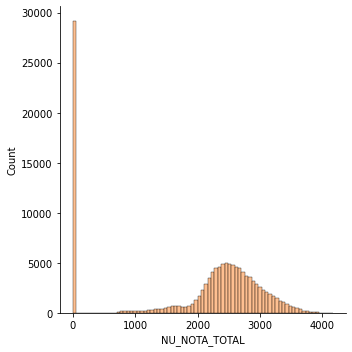

In [7]:
#histograma das notas totais indicando alto número de notas com valor 0
sns.set_palette('copper_r');
sns.displot(dados, x = "NU_NOTA_TOTAL");

# Verificando as notas Zeradas



In [8]:
# Notas zeradas
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_MEDIA
10,NaN,NaN,NaN,NaN,NaN,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [9]:
# Verificando a quanto tempo os alunos que faltaram concluiram o ensino medio
# obs: 0 = Não informado
# obs: 13 = Concluiu antes de 2007 (> que 12 anos) 
dados.query("NU_NOTA_TOTAL == 0")['TP_ANO_CONCLUIU'].value_counts()

0     6903
13    3931
1     3641
2     2927
3     2224
4     1833
5     1561
6     1285
7     1116
8      955
9      804
10     779
11     657
12     546
Name: TP_ANO_CONCLUIU, dtype: int64

In [10]:
# Verificando o Tipo de Escola
# 1 = Não informou , 2 = Pública e 3 = Particular
dados.query("NU_NOTA_TOTAL == 0")['TP_ESCOLA'].value_counts()

1    24485
2     4465
3      212
Name: TP_ESCOLA, dtype: int64

In [11]:
print('Quantidade de quem não informou o ano de conclusão')
print(6903/29162)

print('Quantidade de quem se formou antes de 2007')
print(3931/29162)

print('Tipo de Escola')
print(24485/29162)

print('Faltantes / Total')
print(29162/127380)

Quantidade de quem não informou o ano de conclusão
0.23671215965983128
Quantidade de quem se formou antes de 2007
0.134798710650847
Tipo de Escola
0.8396200534942734
Faltantes / Total
0.22893703878159838


##Sobre as notas zeradas

Uma análise exploratória de dados inicial evidenciou que muitas das provas foram zeradas e uma investigação mais aprofundada provou-se difícil visto que os índices das pessoas que faltaram nos dias de aplicação das provas não possuem **dados suficientes para análise**, dados como a comparação entre a cidade de residência e aplicação da prova que poderia indicar uma possível justificativa das faltas nas provas.  

Seria interessante **adicionar campos nos questionários** como: “**possui filhos e ou dependentes**" nos dados do participante pois isto pode influenciar no comparecimento das provas, visto que aproximadamente 31% das mães brasileiras são solteiras¹ o que por vezes dificulta o deslocamento, cuidados com filhos e gastos extras impossibilitando a realização das provas 

Outra opção interessante seria adicionar o campo **"situação de trabalho"** nas opções: desempregado, trabalho informal, prestador de serviços, estudante e etc nos dados do participante pois isto pode influenciar no comparecimento, gastos com transporte e renda familiar, tendo em vista que o trabalho informal avançou para 41% em 2019². 

Se possível ainda, parte das respostas nos questionários das pessoas que faltaram poderiam ser **respondidas** mesmo que os alunos faltassem a prova para melhoria das análises posteriores a prova.

Alguns dados relevantes destas provas são:

22% do total da amostra (127380) de participantes da amostra **não compareceram as provas**;

23% dos que faltaram não **informaram ano de conclusão do Ensino Médio**(uma parte relevante da amostra);

13% dos que faltaram **concluíram o Ensino Médio ha mais de 12 anos**(Antes de 2007);

83% Não informaram o **Tipo de Escola**; (Pública ou Privada)



# Análise do Desempenho nas Provas

In [12]:
# Criando variavel com renda de forma ordenada para analise
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

In [13]:
# Criando DF sem as notas zeradas
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")

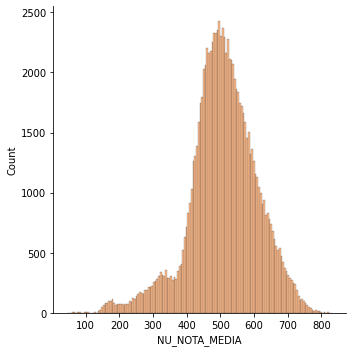

In [14]:
# Dados sem notas zero
sns.displot(dados_sem_nota_zero, x ="NU_NOTA_MEDIA");

In [15]:
# Função para criar graficos de boxplot
def My_boxplot(src, titulo, eixo_X, eixo_Y):
  plt.figure(figsize = (15 , 10))
  sns.boxplot(x = eixo_X, y = eixo_Y, data = src , order = renda_ordenada)
  plt.title(titulo)

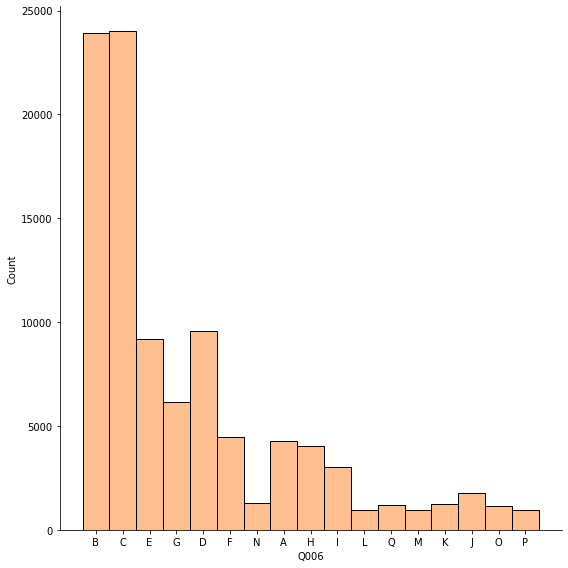

In [16]:
# Histograma de Q006  = Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
sns.displot(dados_sem_nota_zero, x ="Q006", height=8,  binwidth=5);

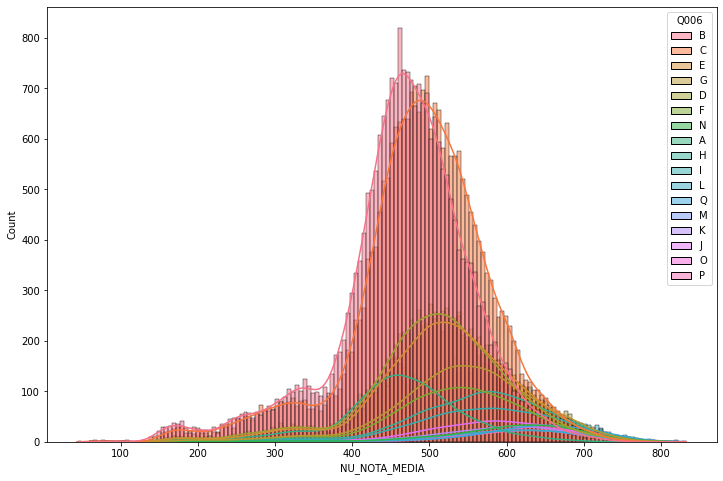

In [17]:
# Histograma de notas e Rendas
# Muito confuso, vale mais analises...
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MEDIA", hue= "Q006", kde=True);

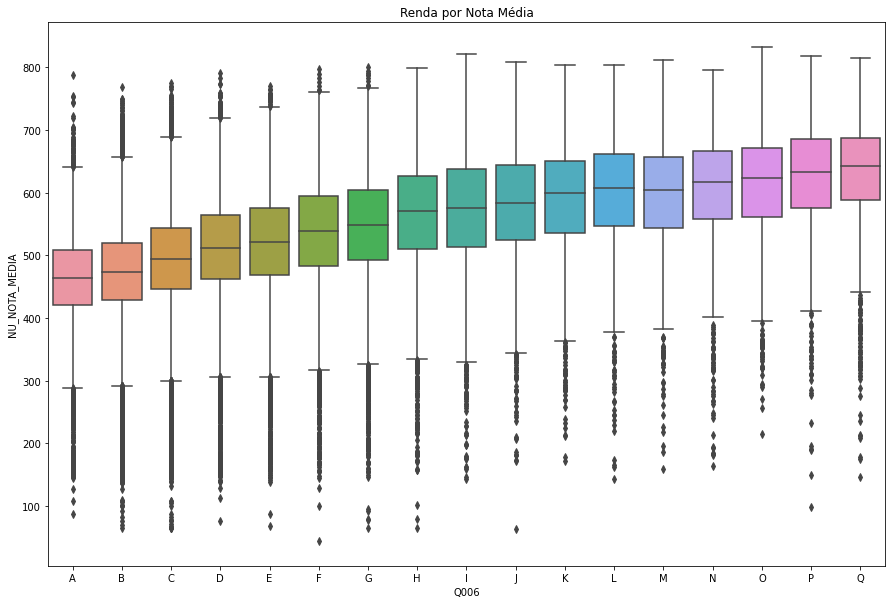

In [18]:
# Box Plot de Renda por Nota Média
My_boxplot(dados_sem_nota_zero, "Renda por Nota Média","Q006","NU_NOTA_MEDIA")

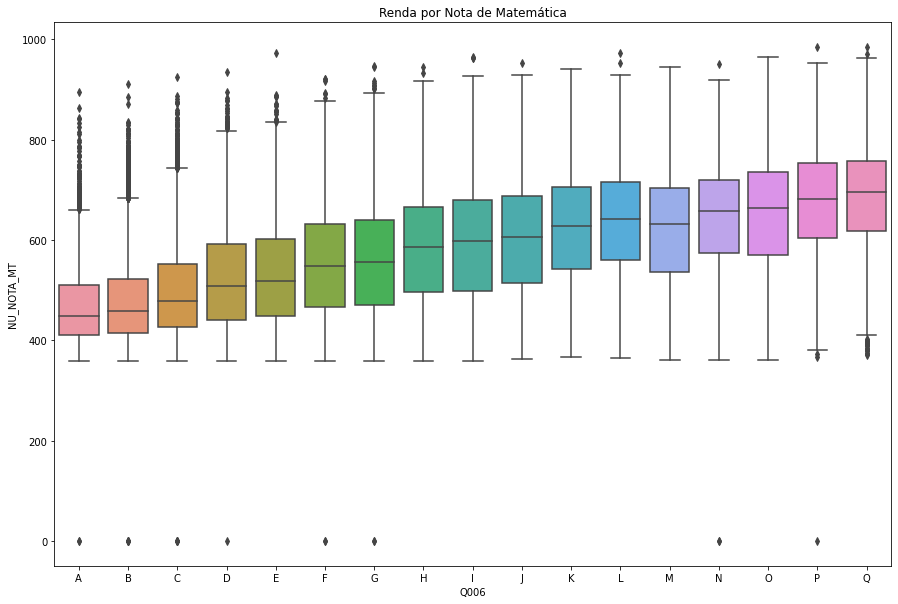

In [19]:
# Box Plot de Renda por Nota de Matemática
My_boxplot(dados_sem_nota_zero, "Renda por Nota de Matemática","Q006","NU_NOTA_MT")

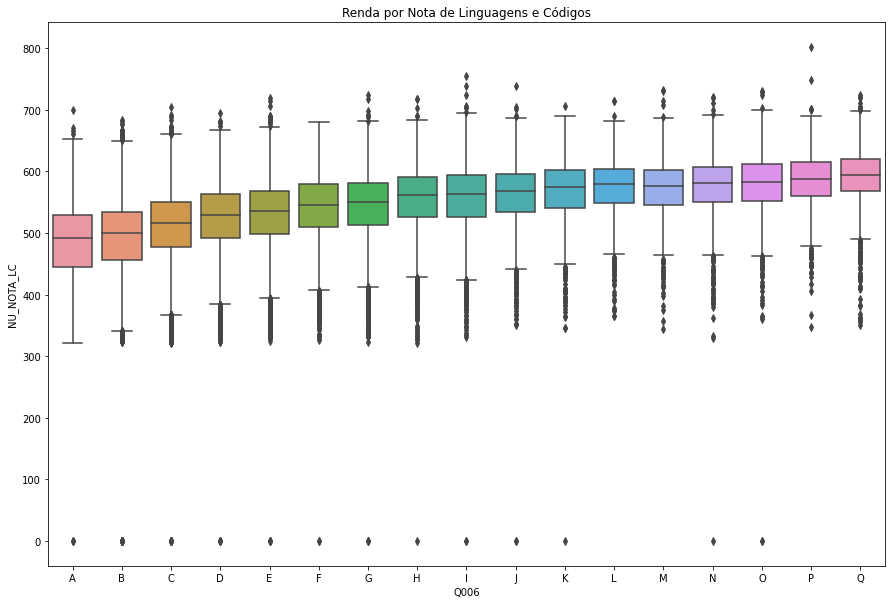

In [20]:
# Box Plot de Renda por Nota de Linguagens e Códigos
My_boxplot(dados_sem_nota_zero, "Renda por Nota de Linguagens e Códigos","Q006","NU_NOTA_LC")

# As Provas

In [21]:
# Correlação entre Provas e Notas
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_MEDIA
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000,1.000000
NU_NOTA_MEDIA,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000,1.000000


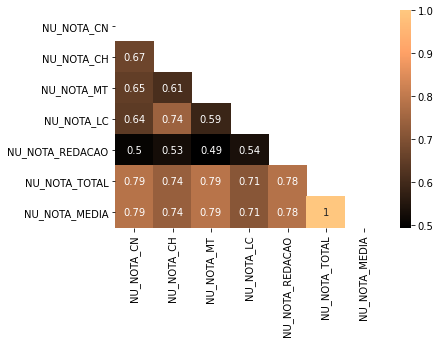

In [22]:
# Heatmap da correlação
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap="copper",  annot=True, mask=mask);

##Sobre Desempenho nas Provas e Renda

  Após uma filtragem dos dados, retirando as notas zeradas, seguiu-se uma análise do desempenho dos estudantes nas cinco provas.

  Uma das informações que se evidenciam nesta análise e a comparação do desempenho dos **estudantes segundo a sua renda**. Estudantes que afirmaram não ter renda ou ter renda de aproximadamente até dois salários mínimos (R$ 998,00)(3) possuem desempenho inferior em diversas análises se comparado aos estudantes com rendas maiores, sendo o maior desempenho dos estudantes com rendas superiores à vinte salários mínimos.

  Um ponto interessante a considerar seria a diminuição das questões ou quantidades de provas, visto que elas possuem uma correlação na pontuação de força média, o que por consequência diminuiria os dias de aplicação das provas, possivelmente favorecendo estudantes de baixa renda, menor deslocamento e custos para o estudante.



# Análise das Notas das Competencias da Redação

In [23]:
#criando variável para competencias_redacao
competencias_redacao = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]

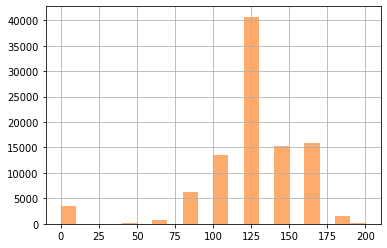

In [24]:
#verificcar comp 5 e renda
dados_sem_nota_zero['NU_NOTA_COMP1'].hist(bins = 20);

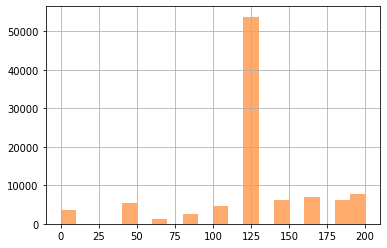

In [25]:
#verificcar comp 5 e renda
dados_sem_nota_zero['NU_NOTA_COMP2'].hist(bins = 20);

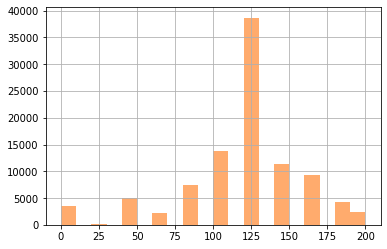

In [26]:
#verificcar comp 5 e renda
dados_sem_nota_zero['NU_NOTA_COMP3'].hist(bins = 20);

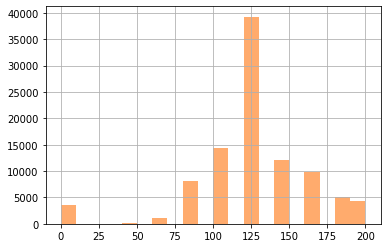

In [27]:
#verificcar comp 5 e renda
dados_sem_nota_zero['NU_NOTA_COMP4'].hist(bins = 20);

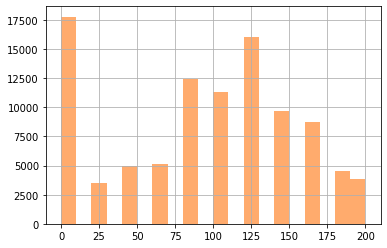

In [28]:
#verificcar comp 5 e renda
dados_sem_nota_zero['NU_NOTA_COMP5'].hist(bins = 20);

A distribuição de notas das competencias da redação são parecidas, com média entre 100 e 150 porém a competencia 5 possui muitos valores zerados


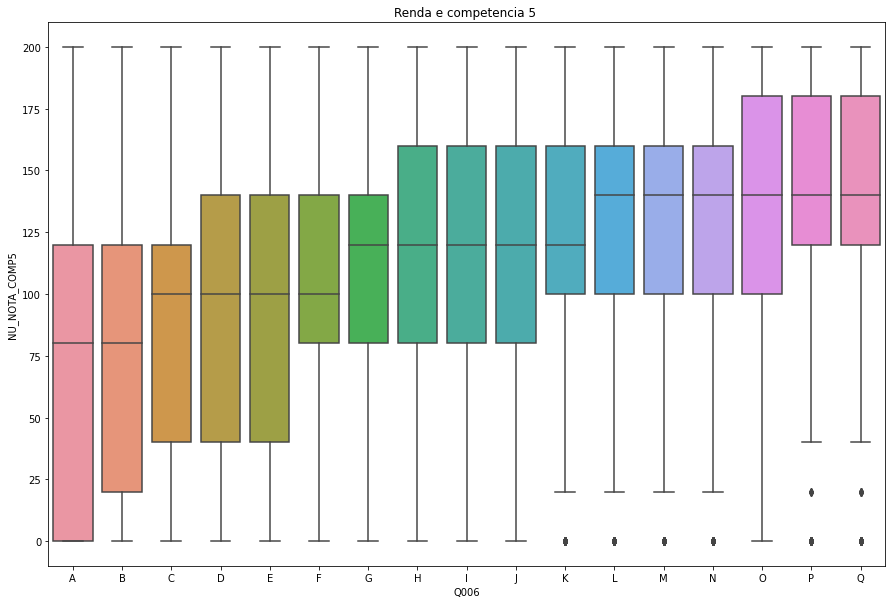

In [29]:
# Renda e competencia 5
My_boxplot(dados_sem_nota_zero, "Renda e competencia 5 ","Q006","NU_NOTA_COMP5")

In [30]:
# Quantidade de Zeros  
# 0 = 1171
dados.query("Q006 == 'A'")["NU_NOTA_COMP5"].value_counts()

0.0      1171
120.0     571
80.0      557
100.0     488
40.0      322
140.0     301
60.0      290
160.0     219
20.0      214
180.0      70
200.0      60
Name: NU_NOTA_COMP5, dtype: int64

In [31]:
dados.query("Q006 == 'A'")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_MEDIA,NU_NOTA_TOTAL
33,190001005812,2019,1502400,Castanhal,15,PA,18,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,15045471.0,1502400.0,Castanhal,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EEADACAEBACACEEECADAAAACAAEAAEDCBBBBCDAABCCBC,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,120.0,80.0,100.0,80.0,460.0,H,E,C,F,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,444.06,2220.3
64,190001007222,2019,1506138,Redenção,15,PA,22,F,1,3,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ECBEBEDEABEAAAECDCEECCBEABDAACCCACCCCDDBCCCCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,80.0,60.0,100.0,0.0,340.0,A,D,B,B,5,A,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,395.86,1979.3
78,190001007676,2019,1503705,Itupiranga,15,PA,17,F,1,1,1,1504208.0,Marabá,15.0,PA,2,0,2,1.0,0,15111741.0,1503705.0,Itupiranga,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CBACDBCBCCADBBBACAEDDECBCBABBCBACBDBECACAEADD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,100.0,80.0,540.0,B,B,A,B,2,A,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,A,427.86,2139.3
113,190001008761,2019,1501402,Belém,15,PA,53,M,2,3,1,1501402.0,Belém,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DAACCBCBBEBCCECCADEEEACCDBDCAAAAEBACDBEBCDABC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,40.0,40.0,60.0,40.0,280.0,H,E,C,B,4,A,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,B,B,B,415.60,2078.0
174,190001011130,2019,1501402,Belém,15,PA,40,F,2,3,1,1501402.0,Belém,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B,C,B,2,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127262,190006113880,2019,1302603,Manaus,13,AM,20,F,1,3,1,1302603.0,Manaus,13.0,AM,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ECBDAABCADDCBCEDEBECAEBEAECCDCDABCECADECCDEEE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,100.0,120.0,80.0,540.0,C,C

In [32]:
#Renda A pelo Total da Competencia 5
1171/5840

0.200513698630137

##Notas das Competências

As nota de redação é composta pela análise de cinco competências:

* Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

* Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

* Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

* Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

* Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

  Todas as competências compõem a nota final da redação e o desempenho dos estudantes foi semelhante obtendo uma distribuição parecida, **exceto pela competência 5** que possui uma alta contagem de notas zeradas. 
  Uma investigação mais aprofundada indicou que **boa parte das notas zeradas são de estudantes que informaram não ter renda (Opção A)**. 
Isto gera uma série de perguntas sobre o que levaria a este resultado e por quê estudantes com baixa renda não conseguem elaborar propostas de intervenção para o problema abordado. 




#Análise de São Paulo

In [33]:
# Dados sem notas Zero de SP
dados_sem_notas_zero_sp = dados_sem_nota_zero.query('SG_UF_RESIDENCIA == "SP"')
dados_sem_notas_zero_sp.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_MEDIA,NU_NOTA_TOTAL
6211,190001247440,2019,3533502,Novo Horizonte,35,SP,19,F,1,3,1,2914802.0,Itabuna,29.0,BA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACCDAACCADEDBABCAECDBEBCB*CACCCDDEBEAEEDCADBE,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,120.0,80.0,520.0,E,C,B,B,3,B,B,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,481.08,2405.4
7040,190001281453,2019,3528403,Mairinque,35,SP,31,F,1,3,1,3528403.0,Mairinque,35.0,SP,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBEBABCBBDAACEDECDCCCBEAEDBEBEECAACDCCBADEEAB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,180.0,200.0,200.0,920.0,E,E,C,D,1,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,B,B,685.58,3427.9
12953,190001518551,2019,3550308,São Paulo,35,SP,28,M,1,1,1,3304201.0,Resende,33.0,RJ,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AAED*EEAECECDDEBADCBCDEABEDDEBCEBAEBDBEAADEEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,160.0,200.0,180.0,140.0,840.0,E,F,D,D,1,J,A,B,B,A,A,B,A,A,A,B,A,A,A,A,A,B,A,B,B,720.96,3604.8
13997,190001560560,2019,3504909,Bananal,35,SP,18,F,1,1,1,3504909.0,Bananal,35.0,SP,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DACACBCABEDDACCCAAECBADDCCAEDCECABABDECABCDEA,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,120.0,120.0,80.0,580.0,D,B,C,B,2,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,A,483.70,2418.5
14209,190001570062,2019,3550308,São Paulo,35,SP,17,M,1,3,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AAEADEEEBEADEBCBAECBBDBBEBCEABBEDEBBDBDCEACBE,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,120.0,120.0,100.0,100.0,540.0,E,E,B,B,2,E,A,C,C,B,A,C,A,B,A,B,A,B,C,B,B,C,B,B,B,545.26,2726.3


In [34]:
# Dados do Brasil sem notas Zero e SP
dados_sem_sp = dados_sem_nota_zero.query('SG_UF_RESIDENCIA != "SP"')
dados_sem_sp.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_MEDIA,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,457.78,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,236.92,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,470.10,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,511.14,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,560.70,2803.5


In [35]:
# Normalizando SP
normalized_SP=(dados_sem_notas_zero_sp["NU_NOTA_MEDIA"] - dados_sem_notas_zero_sp["NU_NOTA_MEDIA"].mean())/dados_sem_notas_zero_sp["NU_NOTA_MEDIA"].std()

In [36]:
# Normalizando SP
normalized_BR=(dados_sem_sp["NU_NOTA_MEDIA"] - dados_sem_sp["NU_NOTA_MEDIA"].mean())/dados_sem_sp["NU_NOTA_MEDIA"].std()

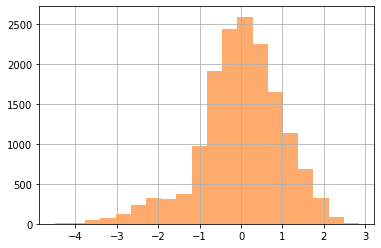

In [37]:
# Dados normalizados SP
normalized_SP.hist(bins = 20);

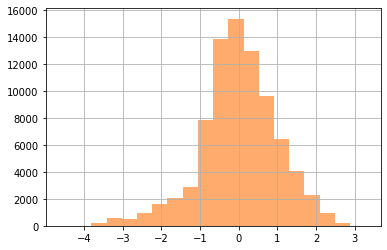

In [38]:
# Dados normalizados para Brasil sem SP
normalized_BR.hist(bins = 20);

##Teste de Hipótese (SP e Brasil)

In [39]:
#Teste T
normalized_SP.mean()
normalized_BR.mean()

ttest,pval = ttest_ind(normalized_SP,normalized_BR)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.9999999999929154
we accept null hypothesis


In [40]:
# Teste Z

ztest ,pval = stests.ztest(normalized_SP, normalized_BR)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9999999999929153
accept null hypothesis


De acordo com o teste Z de hipótese, falhamos em rejeitar a hipótese H0, ou seja as duas amostras SP e o Resto do brasil não possuem médias diferentes 


**Comparando Rendas**

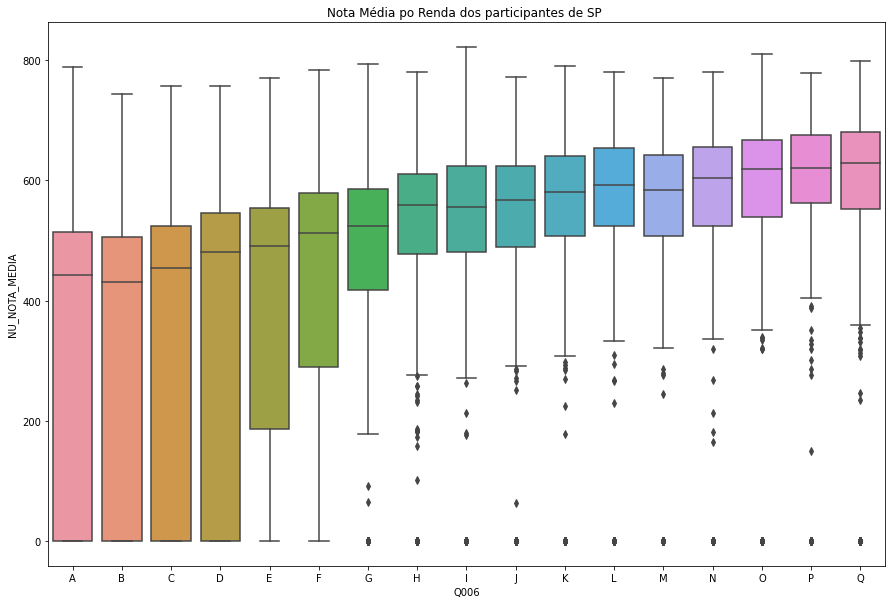

In [41]:
# Nota Média po Renda dos participantes de SP  
My_boxplot(dados.query('SG_UF_RESIDENCIA == "SP"'), "Nota Média po Renda dos participantes de SP ","Q006","NU_NOTA_MEDIA")

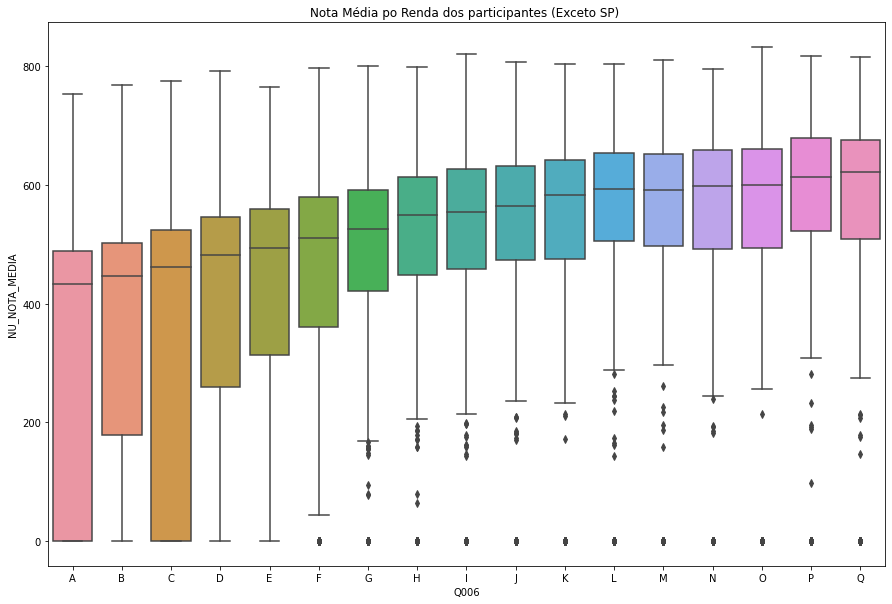

In [42]:
# Nota Média po Renda dos participantes de SP  
My_boxplot(dados.query('SG_UF_RESIDENCIA != "SP"'), "Nota Média po Renda dos participantes (Exceto SP) ","Q006","NU_NOTA_MEDIA")

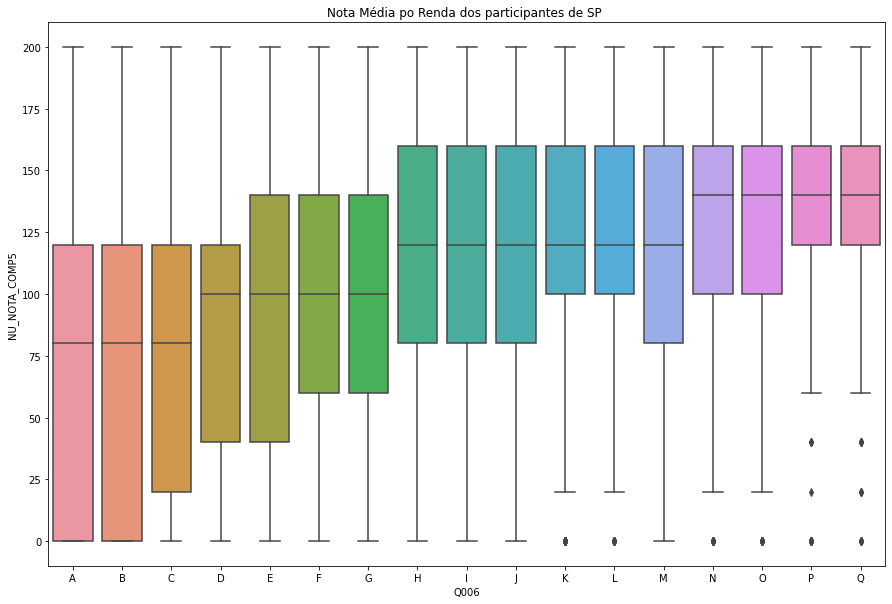

In [43]:
# Nota Média po Renda dos participantes de SP  na COMP5
My_boxplot(dados.query('SG_UF_RESIDENCIA == "SP"'), "Nota Média po Renda dos participantes de SP ","Q006","NU_NOTA_COMP5")

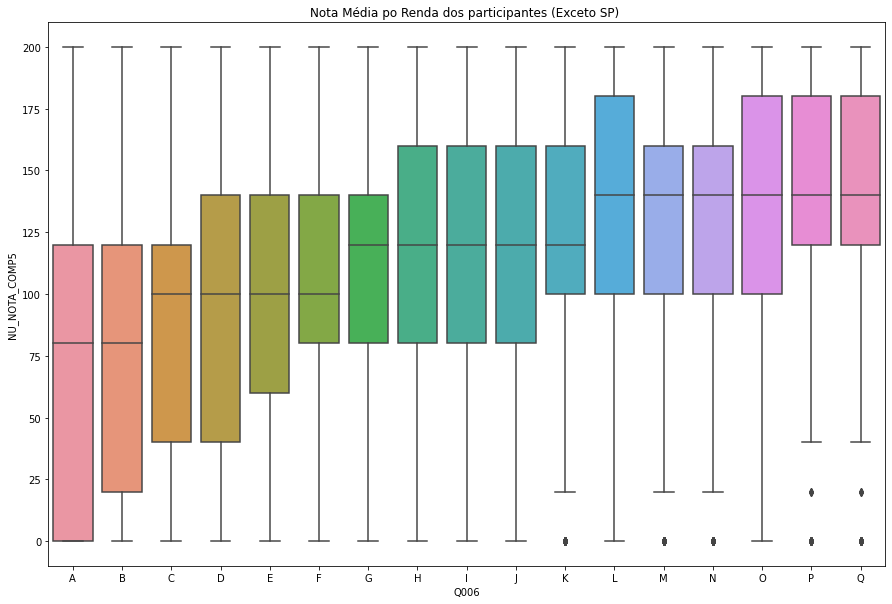

In [44]:
# Nota Média po Renda dos participantes do Brasil  na COMP5
My_boxplot(dados.query('SG_UF_RESIDENCIA != "SP"'), "Nota Média po Renda dos participantes (Exceto SP) ","Q006","NU_NOTA_COMP5")

##Sobre o desempenho em São Paulo

Uma das possibilidades de avaliação de desempenho entre duas amostras pareadas é utilizar o teste p-value.  As análises indicam que **não há diferença significativa** dos estudantes de São Paulo comparado ao resto do Brasil. 

O desempenho dos estudante de São Paulo foi levemente **menor** do que o resto do Brasil se comparado a **Renda**.


#Grau de Instrução dos Responsáveis

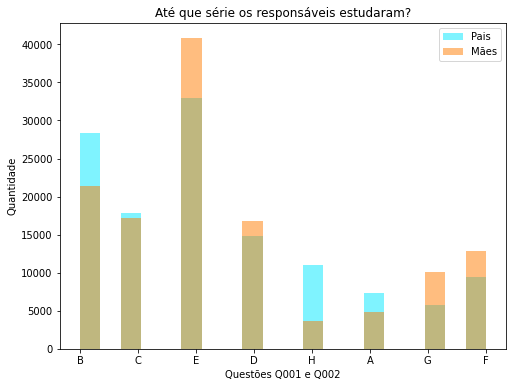

In [45]:
# Q001 = Até que série seu pai, ou o homem responsável por você, estudou?
# Q002 = Até que série sua mãe, ou o mulher responsável por você, estudou?

Quest_Pai = dados["Q001"]
Quest_Mae = dados["Q002"]

plt.figure(figsize=(8, 6))
plt.hist(Quest_Pai, bins=20, alpha=0.5, label='Pais', color='#00E8FF')
plt.hist(Quest_Mae, bins=20, alpha=0.5, label='Mães', color='#FF7C00')
plt.title('Até que série os responsáveis estudaram?')
plt.xlabel('Questões Q001 e Q002')
plt.ylabel('Quantidade')
plt.legend(loc='upper right');

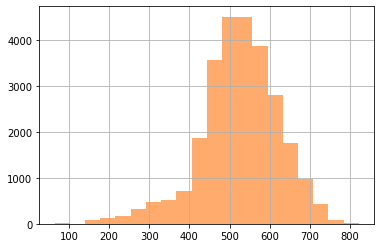

In [46]:
# Instrução do Pai e Nota Média
dados_sem_nota_zero.query('Q001 == "E"')["NU_NOTA_MEDIA"].hist(bins = 20);

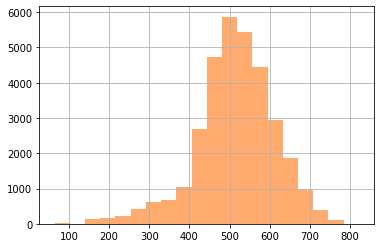

In [47]:
# Instrução da Mãe e Nota Média
dados_sem_nota_zero.query('Q002 == "E"')["NU_NOTA_MEDIA"].hist(bins = 20);

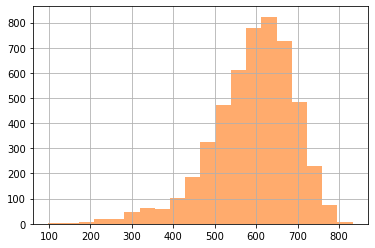

In [48]:
# Instrução do Pai com Pós-Graduação e Nota Média
dados_sem_nota_zero.query('Q001 == "G"')["NU_NOTA_MEDIA"].hist(bins = 20);

##Sobre Instrução dos Responsáveis

Levando em consideração a quantidade de informações da amostra, outra análise possível pôde ser feita sobre o grau de instrução dos responsáveis pelos estudantes que **concentram-se na opção E**, "Completou o Ensino Médio, mas não completou a Faculdade " **seguido de B**, "Não completou a 4ª série/5º ano do Ensino Fundamental. “
Comparado às médias das notas dos responsáveis da opção G “Completou Pós-Graduação”, estes alunos tiveram uma **média maior do que as dos responsáveis com menor instrução.** Esta análise está em consonância coms os estudos feitos em Pires, André. (2015). Renda familiar e escolaridade dos pais: reflexões a partir dos microdados do ENEM 2012 do Estado de São Paulo.


#Acesso à Internet e Computadores

In [49]:
# Q025 = Na sua residência tem acesso à Internet?
total = 127380

# A = 25587
dados.query("Q025 == 'A'")

#B =  98793
dados.query("Q025 == 'B'")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_MEDIA,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,457.78,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,236.92,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,470.10,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,511.14,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,560.70,2803.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127374,190006119995,2019,2927408,Salvador,29,BA,26,F,2,2,1,2927408.0,Salvador,29.0,BA,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,D,B,2,C,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.00,0.0
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montal

In [50]:
valor_A = 25587/total
valor_B = 98793/total
print('Não tem acesso á internet =  {} %'.format(valor_A))
print('Possui acesso á internet =  {} %'.format(valor_B))

Não tem acesso á internet =  0.20087140838436177 %
Possui acesso á internet =  0.7755770136599152 %


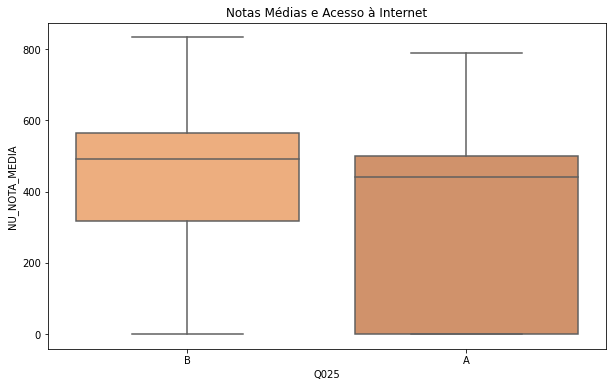

In [51]:
# Notas e Acesso a Internet
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q025", y = "NU_NOTA_MEDIA", data = dados)
plt.title("Notas Médias e Acesso à Internet");

##Relação entre Notas e Ter Computador 

In [52]:
Nota_Total_Media = dados_sem_nota_zero["NU_NOTA_MEDIA"].mean()

In [53]:
#dados.query("Q024 == 'A'") = Não possui Computador
Medias = dados.query("Q024 == 'A'")["NU_NOTA_MEDIA"]>Nota_Total_Media

Medias.value_counts()

False    44018
True     14706
Name: NU_NOTA_MEDIA, dtype: int64

In [54]:
#Não possui Computador & Nota Abaixo da Média / Total
44018/total

0.3455644528183388

In [55]:
#dados.query("Q024 == 'B'") = Possui UM Computador
Medias = dados.query("Q024 == 'B'")["NU_NOTA_MEDIA"]>Nota_Total_Media

Medias.value_counts()

False    29650
True     25297
Name: NU_NOTA_MEDIA, dtype: int64

In [56]:
#Possui UM Computador & Nota Abaixo da Média / Total
29650/total

0.232768095462396

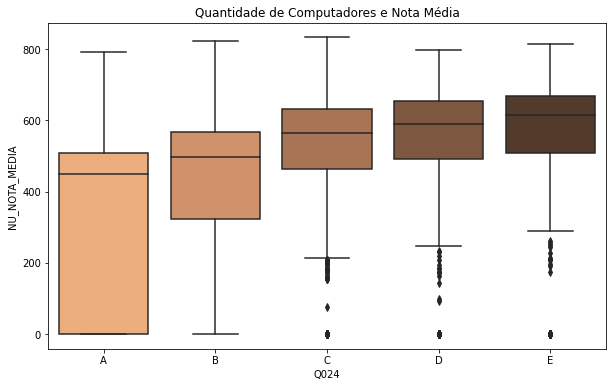

In [57]:
Computadores = dados["Q024"].unique()
Computadores.sort()

# Renda e competencia 5
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q024", y = "NU_NOTA_MEDIA", data = dados, order = Computadores)
plt.title("Quantidade de Computadores e Nota Média");

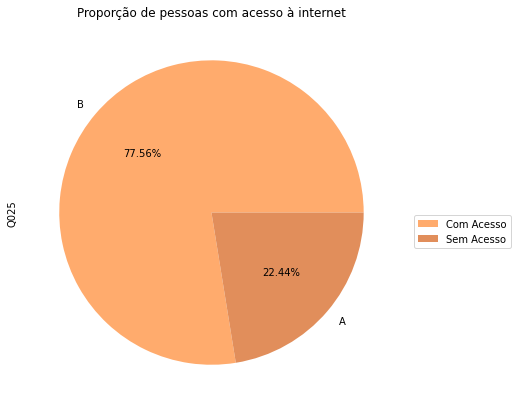

In [58]:
# Pie Chart de Q025 Acesso à Internet
dados["Q025"].value_counts().plot.pie(figsize=(7,7), autopct = '%1.2f%%',)
labels = ['Com Acesso','Sem Acesso']
plt.legend(labels, ncol=1, loc='center right', bbox_to_anchor=(0.8,0.2,0.5,0.5))
plt.title('Proporção de pessoas com acesso à internet');

##Acesso à internet e computadores

Uma última análise realizada faz referência às questões Q024 - “Na sua residência tem computador?” e Q025 - “Na sua residência tem acesso à Internet? “do Questionário socioeconômico.

Em tempos de pandemia, isolamento social, o acesso á internet e o uso de computadores se faz indispensável para estudos visto que possibilita maior troca de informações com outros estudantes, professores, realização de cursos online,realização de trabalhos e projetos, vídeos, avaliação online e acesso a outros materiais para estudo. Um estudante sem acesso à internet e computadores  certamente está em desvantagem em comparação à quem possui ambos.

As análises indicam que, de fato, estudantes **com acesso** à internet e **computadores** possuem **desempenho superior nas provas**.


#Considerações Finais

Diversas questões são levantadas após estas análises, se faz urgente uma reorganização da aplicação do ENEM para que ele permita maior participação dos alunos de baixa renda e a criação de políticas públicas pelo governo para melhoria na educação do ensino público. 

Estudos recentes como **Pires, André. (2015) Indicador De Nível Socioeconômico Dos Inscritos No Enem (2019) e Distribuição espacial do desempenho dos alunos de escolas públicas no ENEM: município de São Paulo (2019)** indicam a mesma tendência encontrada nas análises sobre a correlação negativa entre** renda e desempenho**, reforçando a urgência no tratamento desta questão.

As análises evidenciam problemas de ordem social e históricos em nossa sociedade. Análises posteriores, com os mesmos dados e dados dos anos subsequentes podem ainda indicar outros insights não contemplados neste projeto. 


#Referências

* http://inep.gov.br/microdados 
* https://www.diariodepetropolis.com.br/integra/31-das-maes-brasileiras-sao-solteiras-165844

* https://g1.globo.com/economia/noticia/2019/08/30/trabalho-informal-avanca-para-413percent-da-populacao-ocupada-e-atinge-nivel-recorde-diz-ibge.ghtml
* http://www.guiatrabalhista.com.br/guia/salario_minimo.htm
* https://www.enanpege2019.anpege.ggf.br/resources/anais/8/1559814562_ARQUIVO_completo_enanpege_20190604.pdf 


Pires, André. (2015). Renda familiar e escolaridade dos pais: reflexões a partir dos microdados do ENEM 2012 do Estado de São Paulo. ETD - Educação Temática Digital. 17. 523. 10.20396/etd.v17i3.8638262. 

2019 - Indicador De Nível Socioeconômico Dos Inscritos No Enem: Concepção, Metodologia E Resultados Série Documental Textos Para Discussão, nº47 ISSN 1414-0640 Gabriela Thamara de Freitas Barros , Adriano Souza Senkevics , Adolfo Samuel de Oliveira, Adriano Ferreti Borgatto disponível em: http://td.inep.gov.br/ojs3/index.php/td/article/view/4045/3599



#Idéias para trabalhos posteriores

* Análises comparando estados para verificar as mesmas informações encontradas neste trabalho;
* Aplicação de Redes Neurais para prever notas/renda;
* Outras questões sociais como raça, identidade de gênero, 
* Análises envolvendo acessibilidade.
